In [ ]:
# Installs
!pip install networkx[default]
#--NotebookApp.iopub_data_rate_limit = 10000000.0
# Imports
import numpy as np
import heapq
import string
import time
from scipy.io import mmread
import random
import networkx as nx
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Adjacency matrix for hand-made roadmap of a small part of the Dutch town Beek near Nijmegen**

In [ ]:
beek_25 = np.array([[0,0.12,0,0,0,0,0,0,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0.12,0,0.05,0,0,0,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0.05,0,0.1,0,0.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0.1,0,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13],
                    [0,0,0.08,0,0,0,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0.08,0,0,0,0,0],
                    [0,0,0,0,0,0.05,0,0.05,0,0,0,0,0,0,0,0,0,0,0.08,0,0,0,0,0,0],
                    [0,0.04,0,0,0,0,0.05,0,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0.06,0,0,0,0,0,0,0.13,0,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0.05,0,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0.06,0,0.04,0,0,0,0,0.11,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0.04,0,0.08,0,0,0,0,0.12,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0.08,0,0.1,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0.05,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,0,0.14,0,0.09,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.14,0,0,0,0,0,0,0.08,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0.11,0,0,0,0,0,0,0.03,0.02,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0.12,0,0,0,0,0.03,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0.08,0,0,0,0,0,0,0,0,0,0.02,0,0,0.08,0,0,0,0,0],
                    [0,0,0,0,0,0.08,0,0,0,0,0,0,0,0,0,0,0,0,0.08,0,0.12,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.12,0,0.03,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08,0,0,0,0,0.03,0,0.02,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0,0.04,0],
                    [0,0,0,0,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0,0.07],
                    [0,0,0,0,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0],
                    ])

np.savetxt("beek_25.csv", beek_25, delimiter=",")

beek_25.shape

(25, 25)

### **Loading in some pre-existing graphs**

In [ ]:
# # Graphs sampled from the internet are matrices populated with only zeroes and ones
# # So they have to be multiplied with a random factor to represent roads of different lengths
# # This one uses the chesapeake roads, which consists of 39 vertices
# chesapeake = np.array(mmread("road-chesapeake.mtx").toarray())

# for i in range(0,len(chesapeake)):
#   for j in range(0,len(chesapeake)):
#     chesapeake[i][j] *= random.uniform(0.001,3)

# chesapeake.shape

FileNotFoundError: ignored

In [ ]:
# # This one uses the Europe roads, which consists of 1174 vertices
# raw_text = open('road-euroroad.edges', 'r')
# lines = raw_text.readlines()
# raw_text.close()

# # Extract edgelist from file
# euroroad_edges = []
# for line in lines:
#   node_1, node_2 = map(int,line.split())
#   euroroad_edges.append([node_1 - 1, node_2 - 1])

# # Convert edgelist to adjacency matrix
# size = max(max(euroroad_edges))+1
# euroroad = [[0.0 for i in range(size)] for j in range(size)]
# for tuple_nodes in euroroad_edges:
#   euroroad[tuple_nodes[0]][tuple_nodes[1]] = 1.0

# # Convert to np array for later use
# euroroad = np.array(euroroad)

# # Multiply with random values to get actual "road distances"
# for i in range(0,len(euroroad)):
#   for j in range(0,len(euroroad)):
#     euroroad[i][j] *= random.uniform(0.001,3)

# euroroad.shape

### **Random graph Generation**

In [ ]:

# Retrieve graph
def retrieve_graph(retrieve, graph_name):
  if retrieve:

    # Retrieve the graph plot and its adjacent matrix - the graph just rotates while plotting,
    # but the noteds and edges remains the same

    G = nx.read_graphml(graph_name)
    adj_matrix = nx.adjacency_matrix(G).todense()
    # print(adj_matrix)
    nx.draw(G, with_labels=True)

    return adj_matrix

  return None



[[0.  0.4 0.  0.  0.9 0.  0.  1.7]
 [0.4 0.  2.7 2.4 3.8 0.  2.5 0. ]
 [0.  2.7 0.  0.  0.  0.  0.  3.9]
 [0.  2.4 0.  0.  0.  3.  3.  0. ]
 [0.9 3.8 0.  0.  0.  0.  4.8 0.7]
 [0.  0.  0.  3.  0.  0.  1.5 0. ]
 [0.  2.5 0.  3.  4.8 1.5 0.  0.8]
 [1.7 0.  3.9 0.  0.7 0.  0.8 3. ]]


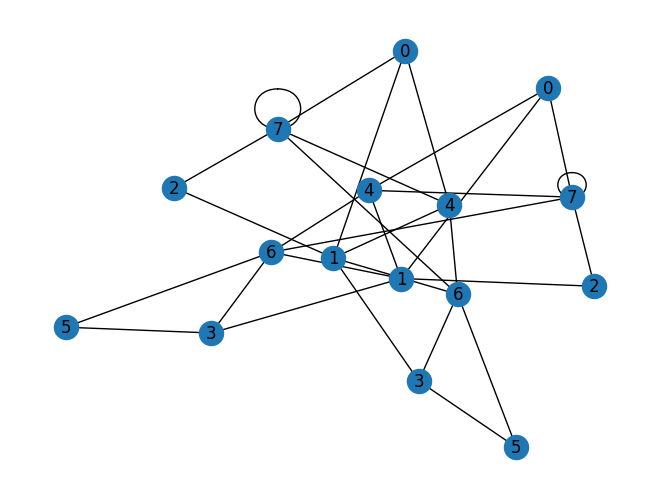

In [110]:
# Code for the random graph generation - the num_nodes need to be changed based on the desired graph.

# Create an empty graph
G = nx.Graph()

# Define the number of nodes (the matrix will be num_nodes x num_nodes) and the average number of edges per node
num_nodes = 8
avg_degree = 4

# Add nodes to the graph
for i in range(num_nodes):
    G.add_node(i)

# Add edges to the graph
for i in range(num_nodes):
    tot_dist = 0
    for j in range(i + 1, num_nodes + 1):
        if j == num_nodes and tot_dist == 0:
          distance = round(random.uniform(0.1, 5.0), 1)
          if i == num_nodes - 1:
            G.add_edge(i, j - 1 , weight=distance)
            G.add_edge(j - 1, i, weight=distance)
          else:
            j = random.randint(i + 1, num_nodes -1)
            G.add_edge(i, j , weight=distance)
            G.add_edge(j, i, weight=distance)

        if random.random() < (avg_degree) / num_nodes and j < num_nodes:
            distance = round(random.uniform(0.1, 5.0), 1) # generate a random distance between 0.1 and 5
            tot_dist += distance
            #distance = 1
            if random.random() < 0.1:
                # Only add the edge in one direction
                G.add_edge(i, j, weight=distance)
            else:
                # Add the edge in both directions
                G.add_edge(i, j, weight=distance)
                G.add_edge(j, i, weight=distance)

# Print the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()
print(adj_matrix)
nx.draw(G, with_labels=True)

# Save the graph into a .graphml extension
graph_name = "testing_graph" + str(num_nodes) + ".graphml"
nx.write_graphml(G, graph_name)

retrieve = True
rnd_adj_matrix = retrieve_graph(retrieve, graph_name)

### **Dijkstra's algorithm**

In [ ]:
# Dijkstra's algorithm
def dijkstra(graph, start, end):
    # Create a priority queue to store vertices to visit and distances from start
    pq = [(0, start)]
    # Create a dictionary to store the shortest distance found for each vertex
    distances = {start: 0}
    # Create a dictionary to store the previous vertex in the shortest path
    previous = {}
    # While there are still vertices to visit in the queue
    while pq:
        # Pop the vertex with the smallest distance from the queue
        (dist, current) = heapq.heappop(pq)
        # If we've found the end vertex, we can stop searching
        if current == end:
            break
        # For each neighbor of the current vertex
        for neighbor, cost in enumerate(graph[current]):
            if cost != 0:
              # Calculate the new distance to the neighbor via the current vertex
              new_distance = distances[current] + cost
              # If the new distance is shorter than the current shortest distance to the neighbor
              if neighbor not in distances or new_distance < distances[neighbor]:
                  # Update the shortest distance to the neighbor
                  distances[neighbor] = new_distance
                  # Set the previous vertex to the current vertex
                  previous[neighbor] = current
                  # Add the neighbor and its distance to the queue
                  heapq.heappush(pq, (new_distance, neighbor))
    # If we've found a path to the end vertex, create a list of the vertices in the path
    if end in previous:
        path = [end]
        while path[-1] != start:
            path.append(previous[path[-1]])
        path.reverse()
        return path
    # If we didn't find a path to the end vertex, return None
    else:
        return None

### **The Genetic Algorithm**

In [ ]:
# Genetic Algorithm framework

# Code that generates num_routes random routes from node start_node to node end_node for the genetic algorithm
def generate_random_route(adj_matrix, start_node, end_node, N_backtracks, max_attempts, restart_node, visited = None):
    """Generates a random route from start_node to end_node using adj_matrix, while backtracking N_backtracks times for max_attempts attempts
    in the case of getting stuck in a local optimum"""
    route = [start_node]
    if visited == None:
      visited = set([start_node])
    current_node = start_node
    n_attempts = 0

    while current_node != end_node:
        # Get the indices of nodes that are adjacent to the current node and haven't been visited yet
        adj_indices = [i for i, val in enumerate(adj_matrix[current_node]) if val != 0 and i not in visited]

        if len(adj_indices) == 0:
            # No adjacent nodes left to explore, pop the last N_backtracks elements, if this fails max_attempts times, restart completely
            if len(route) > N_backtracks and n_attempts <= max_attempts:
              n_attempts += 1
              for i in range(N_backtracks):
                current_node = route.pop()
                visited.remove(current_node)

              route.append(current_node)
              visited.add(current_node)

            else:
              route = [restart_node]
              visited = set([restart_node])
              current_node = restart_node
              n_attempts = 0

        else:
            # Choose a random adjacent node to explore
            next_node = random.choice(adj_indices)
            route.append(next_node)
            visited.add(next_node)
            current_node = next_node
    return route

def generate_random_routes(adj_matrix, start_node, end_node, num_routes, N_backtracks, max_attempts):
    """Generates starting population consisting of num_routes random routes from start_node to end_node using adj_matrix"""
    routes = []
    for i in range(num_routes):
        route = generate_random_route(adj_matrix, start_node, end_node, N_backtracks, max_attempts, start_node)
        routes.append(route)
    return routes

def fitness(route, adj_matrix):
  """Returns the fitness (total distance) of a given route using adj_matrix"""
  return np.sum(np.array([adj_matrix[route[i]][route[i+1]] for i in range(len(route) - 1)]))

def crossover(route_1, route_2, start_node, end_node):
  """Performs crossover on two routes by swapping the unique parts between two shared nodes"""
  common_nodes = set(route_1).intersection(route_2)
  common_nodes -= {start_node,end_node}
  route_1, route_2 = np.array(route_1), np.array(route_2)
  candidates = []


  for idx, node1 in enumerate(common_nodes):
    for node2 in np.delete(np.array(list(common_nodes)), idx):

      idx_1 = np.where(route_1 == node1)[0][0]
      idx_2 = np.where(route_1 == node2)[0][0]
      idx_3 = np.where(route_2 == node1)[0][0]
      idx_4 = np.where(route_2 == node2)[0][0]

      # -1 because we are not interested in nodes that are immediately next to eachother
      # The slicing part of the clause is there to ensure that the swapped parts are not exactly similar, as this produces no result
      if idx_1 < idx_2 - 1 and idx_3 < idx_4 -1 and not np.array_equal(route_1[idx_1 + 1 : idx_2], route_2[idx_3 + 1 : idx_4])  \
      and np.intersect1d(np.delete(route_1, range(idx_1 + 1, idx_2)), route_2[idx_3 + 1 : idx_4]).size == 0                     \
      and np.intersect1d(np.delete(route_2, range(idx_3 + 1, idx_4)), route_1[idx_1 + 1 : idx_2]).size == 0:
        candidates.append([idx_1,idx_2,idx_3,idx_4])

  if candidates:

    swap = random.choice(candidates)

    # Prepare the route parts that will be inserted
    route_1_swap, route_2_swap = route_2[swap[2] + 1 : swap[3]], route_1[swap[0] + 1 : swap[1]]

    # Delete the route parts that will be removed
    route_1, route_2 = np.delete(route_1, range(swap[0] + 1, swap[1])), np.delete(route_2, range(swap[2] + 1, swap[3]))

    # Insert the new route parts
    route_1, route_2 = np.insert(route_1, swap[0] + 1, route_1_swap), np.insert(route_2,swap[2] + 1, route_2_swap)

  return route_1, route_2

def mutation(route, end_node, start_node, adj_matrix, N_backtracks, max_attempts, mode):
  """Performs mutation on a single route by cutting it off at a random point and regenerating it to the end_node with
  the use of the adj_matrix and N_backtracks + max_attempts attempts , the mode decides whether mutation happens at a
  truly random point (for diversity) or closer to the destination (for efficiency)"""

  # For smaller routes, errors will be produced
  if len(route) >= 3:
    if mode == "efficiency":

      # Create weights skewed towards the end of the route, so mutation happens more often near the end
      probs = np.array([1 * (1.2**i) for i in range (1,len(route) -2)])
      probs /= np.sum(probs)

      idx = np.random.choice(a = np.array([i for i in range(1,len(route) - 2)]),p = probs)

    else:
      # We don't want to mutate from either the first or last element, as this is the same as starting over / keeping everything constant
      idx = random.randint(1,len(route) - 2)

    route = route[:idx]
    visited = set(route)
    # Pass visited to the generator to avoid looping.
    route_extension = generate_random_route(adj_matrix,route[-1],end_node, N_backtracks, max_attempts, start_node, visited = visited)

    # If a restart has been forced (indicated by the start of the newly generated route being the start node), the route is replaced
    if route_extension[0] == start_node:
      route = route_extension
    # Otherwise, the two are appended
    else:
      route = np.append(route[:-1], route_extension)


  return route

def simulation(adj_matrix, start_node, end_node, num_routes, N_backtracks, max_attempts, mode, sampling_strategy, N_iterations, K):
  """Performs simulation by generating a starting population, performing crossover and mutation, and performing selection"""
  if mode != "efficiency" and mode != "diversity":
    raise Exception("Invalid sampling strategy")
  if sampling_strategy != "traditional" and sampling_strategy != "tournament":
    raise Exception("Invalid probability mode")
  if(K > num_routes and sampling_strategy == "tournament"):
    warnings.warn("A K-value higher than the population size will introduce duplicate parents, this may result in redundant crossover")

  start_time = time.time() # Starting time

  starting_pop = np.array(generate_random_routes(adj_matrix, start_node, end_node, num_routes, N_backtracks, max_attempts),dtype='object')

  n = 0
  global_optimum = ([], float('inf'))



  # Traditional sampling

  if sampling_strategy == "traditional":

    while n < N_iterations:

      children_pop = []
      fitnesses = np.array([fitness(i,adj_matrix) for i in starting_pop])

      # Elitism
      if np.amin(fitnesses) < global_optimum[1]:
        global_optimum = (starting_pop[np.argmin(fitnesses)],np.amin(fitnesses))
        print("New optimum found in " + str(time.time() - start_time) + " with distance " + str(global_optimum[1]) + " and route " + str(global_optimum[0]))


      reciprocals = [1 / value for value in fitnesses]
      sum_reciprocals = np.sum(reciprocals)

      relative_fitnesses = [reciprocal / sum_reciprocals for reciprocal in reciprocals]


      while len(children_pop) < num_routes:

        parent_indices = np.random.choice(range(0,len(starting_pop)), 2, p=relative_fitnesses)

        child_1, child_2 = crossover(starting_pop[parent_indices[0]],starting_pop[parent_indices[1]],start_node,end_node)
        child_1, child_2 = mutation(child_1, end_node, start_node, adj_matrix, N_backtracks, max_attempts, mode), mutation(child_2, end_node, start_node, adj_matrix, N_backtracks, max_attempts, mode)

        children_pop.extend([child_1,child_2])

      # Children replace parents, increase counter
      starting_pop = children_pop
      children_pop = []
      n += 1


      # Tournament sampling
  if sampling_strategy == "tournament":

    while n < N_iterations:

      children_pop = []
      fitnesses = np.array([fitness(i,adj_matrix) for i in starting_pop])

      # Elitism
      if np.amin(fitnesses) < global_optimum[1]:
        global_optimum = (starting_pop[np.argmin(fitnesses)],np.amin(fitnesses))
        print("New optimum found in " + str(time.time() - start_time) + " seconds with distance " + str(global_optimum[1]) + " and route " + str(list(global_optimum[0])))


      while len(children_pop) < num_routes:

        parent_indices = []

        for index in range(2):
          # Sample K parents and keep the fittest

          K_parent_indices = [random.randint(0, num_routes - 1) for i in range(K)]
          K_sampled_fitnesses = [fitnesses[parent] for parent in K_parent_indices]

          parent_indices.append(K_parent_indices[np.argmin(K_sampled_fitnesses)])

        child_1, child_2 = crossover(starting_pop[parent_indices[0]],starting_pop[parent_indices[1]],start_node,end_node)
        child_1, child_2 = mutation(child_1, end_node, start_node, adj_matrix, N_backtracks, max_attempts, mode), mutation(child_2, end_node, start_node, adj_matrix, N_backtracks, max_attempts, mode)

        children_pop.extend([child_1,child_2])

      # Children replace parents, increase counter
      starting_pop = children_pop
      children_pop = []
      n += 1



### **Testing on a real-life graph**

In [73]:
# Test run with Dijkstra's algorithm

start = 0 # The start node
end = 24 # The goal node

# Time how long it takes
start_time = time.time()

matrix = rnd_adj_matrix
matrix = beek_25


# Return shortest path
shortest_path = dijkstra(matrix, start, end)

# Register Time
print("--- Execution time in seconds: %s ---" % (time.time() - start_time))

print(shortest_path)

--- Execution time in seconds: 0.0005564689636230469 ---
[0, 1, 2, 3, 4, 24]


In [74]:
# Test run with Genetic algorithm

# Set experiment values here, feel free to try this with other graphs
adj_matrix = beek_25 # The adjacency matrix for the used graph
start_node = 0 # The start node
end_node = 24 # The goal node
num_routes = 10 # Number of random roads that will form the starting population
N_backtracks = 3 # The number of steps taken backwards when stuck
max_attempts = 2 # The maximum number of tries to get unstuck before restarting from start_node
mode = "efficiency" # The mode used in mutation, efficiency results in mutation happening more often at the end the route, diversity results in even-spread mutation
sampling_strategy = "traditional" # The sampling strategy used (e.g. traditional or tournament)
N_iterations = 100 # The maximum number of iterations

K = 5 # K-value for tournament sampling


simulation(adj_matrix, start_node, end_node, num_routes, N_backtracks, max_attempts, mode, sampling_strategy, N_iterations, K)

New optimum found in 0.008830547332763672 with distance 0.46 and route [0, 1, 2, 3, 4, 24]


### **Testing on a randomly generated graph**

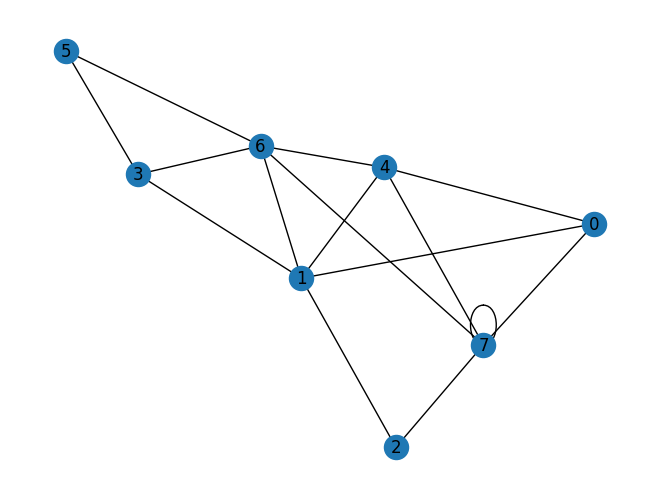

In [114]:
# Load the randomly generated adjacency matrix
retrieve = True
num_nodes = 8
graph_name = "testing_graph" + str(num_nodes) + ".graphml"
rnd_adj_matrix = retrieve_graph(retrieve, graph_name)

In [79]:
# Test run with Dijkstra's algorithm

start = 0 # The start node
end = num_nodes-1 # The goal node

# Time how long it takes
start_time = time.time()

# Return shortest path
shortest_path = dijkstra(rnd_adj_matrix, start, end)

# Register Time
print("--- Execution time in seconds: %s ---" % (time.time() - start_time))

print(shortest_path)

--- Execution time in seconds: 0.0002262592315673828 ---
[0, 3, 7]


In [77]:
# Set experiment values here
adj_matrix = rnd_adj_matrix # The adjacency matrix for the used graph
start_node = 0 # The start node
end_node = num_nodes-1 # The goal node
num_routes = 100 # Number of random roads that will form the population
N_backtracks = 3 # The number of steps taken backwards when stuck
max_attempts = 2 # The maximum number of tries to get unstuck before restarting from start_node
mode = "diversity" # The mode used in mutation, efficiency results in mutation happening more often at the end the route, diversity results in even-spread mutation
sampling_strategy = "tournament" # The sampling strategy used (e.g. traditional or tournament)
N_iterations = 2000 # The maximum number of iterations

K = 10 # K-value for tournament sampling


simulation(rnd_adj_matrix, start_node, end_node, num_routes, N_backtracks, max_attempts, mode, sampling_strategy, N_iterations, K)

New optimum found in 0.009702682495117188 seconds with distance 1.4 and route [0, 3, 7]


<ipython-input-108-c52a4ce4a20b>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Genetic_tra_100_Mean'] = df[['Genetic_1_100_tra', 'Genetic_2_100_tra', 'Genetic_3_100_tra']].mean(axis=1)
<ipython-input-108-c52a4ce4a20b>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Genetic_tra_100_Std'] = df[['Genetic_1_100_tra', 'Genetic_2_100_tra', 'Genetic_3_100_tra']].std(axis=1)
<ipython-input-108-c52a4ce4a20b>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Genetic_trn_50_Mean

,Nodes,Dijkstra,Genetic_1_100_trn,Genetic_2_100_trn,Genetic_3_100_trn,Genetic_1_100_tra,Genetic_2_100_tra,Genetic_3_100_tra,Genetic_1_50_trn,Genetic_2_50_trn,Genetic_3_50_trn,Genetic_trn_100_Mean,Genetic_trn_100_Std,Genetic_tra_100_Mean,Genetic_tra_100_Std,Genetic_trn_50_Mean,Genetic_trn_50_Std
0,25,0.00054,0.00242,0.00733,0.00326,0.00925,0.008266,0.09226,0.018032,0.840319,"0,66583",0.004337,0.002626,0.050263,0.059393,0.429175,0.581445
1,8,0.00019,0.00862,0.00680,0.00670,"0,01295",0.009821,0.01903,0.007990,0.012510,"0,00824",0.007373,0.001081,0.014425,0.006512,0.010250,0.003196
2,16,0.00026,0.01021,0.01159,0.01231,"0,04569",0.067230,0.06199,0.022013,0.935550,109.023,0.011370,0.001067,0.064610,0.003705,0.478782,0.645968
3,32,0.00047,0.02694,0.03532,0.06783,"0,02901",0.022560,0.06829,0.073880,0.511720,"0,71374",0.043363,0.021599,0.045425,0.032336,0.292800,0.309600
4,64,0.00168,0.11484,0.22676,0.18035,0,0.953670,0.00000,0.599310,4.000000,1,0.173983,0.056231,0.476835,0.674347,2.299655,2.404651
5,128,0.00105,6.30739,6.09903,8.78185,"3,1298",5.000000,1.00000,0.837280,2.000000,2,7.062757,1.492419,3.000000,2.828427,1.418640,0.822167
6,256,0.02663,5.61906,4.02965,15.99274,"5,6316",15.000000,5.00000,3.000000,5.000000,3,8.547150,6.496858,10.000000,7.071068,4.000000,1.414214
7,512,0.01888,13.42941,7.13537,15.99274,9,6.000000,7.00000,14.000000,3.000000,4,12.185840,4.557752,6.500000,0.707107,8.500000,7.778175
8,1024,0.02103,9.01564,13.80750,7.36050,6,5.000000,5.00000,11.000000,17.000000,26,10.061213,3.348264,5.000000,0.000000,14.000000,4.242641
9,2028,0.05720,39.49755,57.47616,42.55359,55,50.000000,63.00000,33.000000,39.000000,31,46.509100,9.619883,56.500000,9.192388,36.000000,4.242641


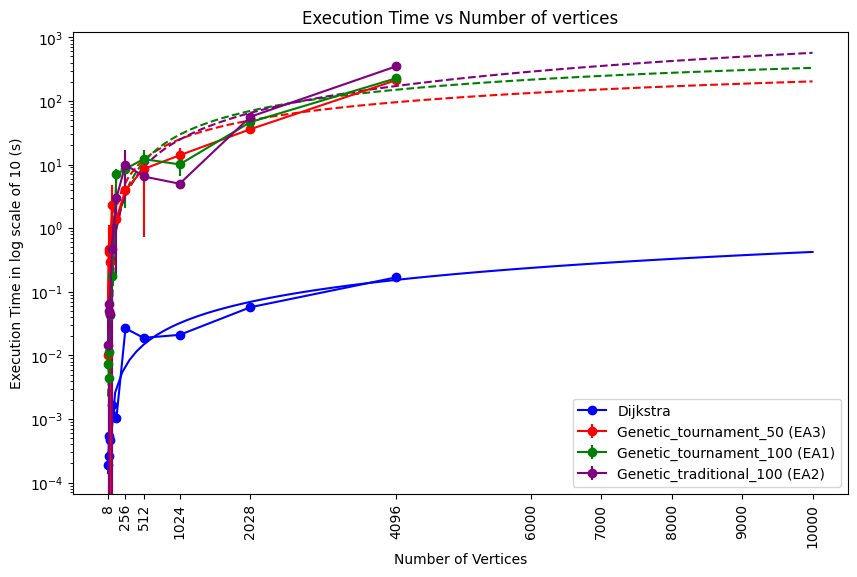

In [108]:

# Load the data
df = pd.read_csv('/content/NC_new.csv', sep=';', decimal=',')

# Compute mean and standard deviation for Genetic algorithm execution times


df['Genetic_trn_100_Mean'] = df[['Genetic_1_100_trn', 'Genetic_2_100_trn', 'Genetic_3_100_trn']].mean(axis=1)
df['Genetic_trn_100_Std'] = df[['Genetic_1_100_trn', 'Genetic_2_100_trn', 'Genetic_3_100_trn']].std(axis=1)

df['Genetic_tra_100_Mean'] = df[['Genetic_1_100_tra', 'Genetic_2_100_tra', 'Genetic_3_100_tra']].mean(axis=1)
df['Genetic_tra_100_Std'] = df[['Genetic_1_100_tra', 'Genetic_2_100_tra', 'Genetic_3_100_tra']].std(axis=1)

df['Genetic_trn_50_Mean'] = df[['Genetic_1_50_trn', 'Genetic_2_50_trn', 'Genetic_3_50_trn']].mean(axis=1)
df['Genetic_trn_50_Std'] = df[['Genetic_1_50_trn', 'Genetic_2_50_trn', 'Genetic_3_50_trn']].std(axis=1)
# Convert 'Nodes' column to numeric
df['Nodes'] = pd.to_numeric(df['Nodes'], errors='coerce')

# Convert 'Dijkstra' column to numeric
df['Dijkstra'] = pd.to_numeric(df['Dijkstra'], errors='coerce')

display(df)
# Drop any rows with NaN values (resulted from 'coerce')
df = df.dropna()

# Fit the models (we use a degree 1 polynomial since we're working with log-transformed data)
coeffs_dijkstra = np.polyfit(np.log(df['Nodes']), np.log(df['Dijkstra']), deg=2)
coeffs_genetic_trn_100 = np.polyfit(np.log(df['Nodes']), np.log(df['Genetic_trn_100_Mean']), deg=2)
coeffs_genetic_tra_100 = np.polyfit(np.log(df['Nodes']), np.log(df['Genetic_tra_100_Mean']), deg=2)
coeffs_genetic_trn_50 = np.polyfit(np.log(df['Nodes']), np.log(df['Genetic_trn_50_Mean']), deg=2)

# Generate additional values for the x-axis
x_new = np.linspace(df['Nodes'].min(), 10000, 100)  # Adjust the range and number of points as needed

# Evaluate the models for the additional values
dijkstra_model_predictions = np.exp(np.polyval(coeffs_dijkstra, np.log(x_new)))
genetic_trn_100_model_predictions = np.exp(np.polyval(coeffs_genetic_trn_100, np.log(x_new)))
genetic_tra_100_model_predictions = np.exp(np.polyval(coeffs_genetic_tra_100, np.log(x_new)))
genetic_trn_50_model_predictions = np.exp(np.polyval(coeffs_genetic_trn_50, np.log(x_new)))

plt.figure(figsize=(10, 6))

# Plot Dijkstra's algorithm execution times and fitted model
plt.plot(df['Nodes'], df['Dijkstra'], marker='o', linestyle='-', color='blue', label='Dijkstra')
plt.plot(x_new, dijkstra_model_predictions, color='blue' )#, linestyle='--', label='Dijkstra Model')

# Plot Genetic algorithm execution times with error bars and fitted model
plt.errorbar(df['Nodes'], df['Genetic_trn_50_Mean'], yerr=df['Genetic_trn_50_Std'], marker='o', linestyle='-', color='red', label='Genetic_tournament_50 (EA3)')
plt.plot(x_new, genetic_trn_50_model_predictions, color='red', linestyle='--') #, label='Genetic Model')

# Plot Genetic algorithm execution times with error bars and fitted model
plt.errorbar(df['Nodes'], df['Genetic_trn_100_Mean'], yerr=df['Genetic_trn_100_Std'], marker='o', linestyle='-', color='green', label='Genetic_tournament_100 (EA1)')
plt.plot(x_new, genetic_trn_100_model_predictions, color='green', linestyle='--') #, label='Genetic Model')


plt.errorbar(df['Nodes'], df['Genetic_tra_100_Mean'], yerr=df['Genetic_tra_100_Std'], marker='o', linestyle='-', color='purple', label='Genetic_traditional_100 (EA2)')
plt.plot(x_new, genetic_tra_100_model_predictions, color='purple' , linestyle='--') #, label='Genetic Model')

# Set specific x-label values
x_labels = [8, 256, 512,1024, 2028, 4096, 6000, 7000, 8000, 9000, 10000]
plt.xticks(x_labels, rotation='vertical')


plt.yscale('log')
plt.xlabel('Number of Vertices')
plt.ylabel('Execution Time in log scale of 10 (s)')
plt.title('Execution Time vs Number of vertices')
plt.legend()

plt.show()


In [109]:
df_csv = df[['Nodes','Dijkstra','Genetic_trn_100_Mean','Genetic_trn_100_Std','Genetic_tra_100_Mean','Genetic_tra_100_Std','Genetic_trn_50_Mean','Genetic_trn_50_Std']]
df_csv.to_csv("results_table.csv")